In [18]:
import sklearn
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [39]:
X = pd.read_csv("../pcpca/data/toy/foreground.csv", header=None).transpose().set_axis(['X','Y'], axis='columns')
Y = pd.read_csv("../pcpca/data/toy/background.csv", header=None).transpose().set_axis(['X','Y'], axis='columns')
X['Class'] = 'Case'
Y['Class'] = 'Control'
df = pd.concat([X,Y], ignore_index=True)





In [41]:
df.tail()

,X,Y,Class
395,-1.488271,-1.159925,Control
396,0.206345,0.654691,Control
397,-0.783420,-0.803600,Control
398,-1.749469,-1.113517,Control
399,1.841279,2.022421,Control


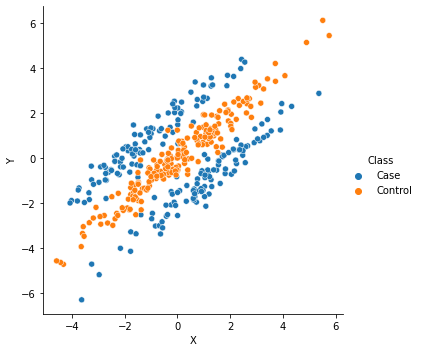

In [43]:
sns.relplot(data = df, x ='X', y='Y', hue = 'Class')

In [44]:
def df_2_array(df):
    return np.array([df.X, df.Y]).T

In [81]:
np.linalg.norm(p-q)

0.0

In [99]:
pca = PCA()
pca.fit(df_2_array(df))
alpha = 0.25*np.pi
M = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])

m = pca.mean_
scale = np.diag(1/np.sqrt(pca.explained_variance_))
X = df_2_array(df)-m
p = pca.transform(df_2_array(df)).T
df['P1'],df['P2'] = M@X.T

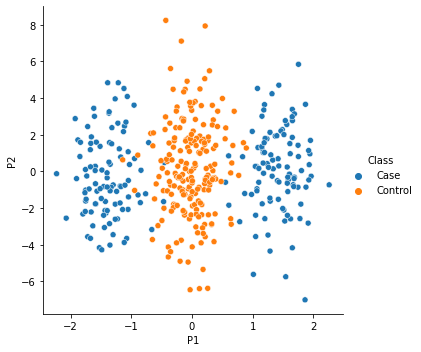

In [100]:
sns.relplot(data = df, x ='P1', y='P2', hue = 'Class')


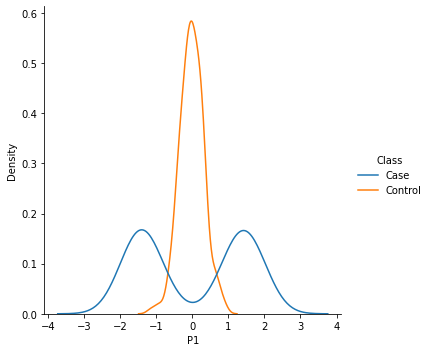

In [106]:
sns.displot(data=df, x="P1", hue='Class', kind = 'kde')

In [75]:
df_2_array(df).shape

(400, 2)

In [63]:
pca.components_ = np.eye(2)

In [65]:
pca.components_

array([[1., 0.],
       [0., 1.]])